In [1]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Layer, Conv2D, Flatten, Input
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

In [2]:
class CNNResidual(Layer):
    def __init__(self, layers, filters, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [Conv2D(filters, (3,3), activation='relu')
                       for _ in range(layers)]
    
    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        # sommando implemento il residual block
        return inputs + x

In [6]:
class MYResidual(Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = CNNResidual(2, 32)
        self.hidden2 = CNNResidual(2, 64)
        self.flatten = Flatten()
        self.out = Dense(1, activation="sigmoid")
        
    def call(sel, inputs):
        x = self.hidden1(inputs)
        x = self.hidden2(x)
        x = self.flatten(x)
        out = self.out(x)
        
        return out

In [7]:
model = MYResidual()

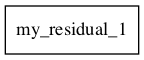

In [9]:
plot_model(model)